In [4]:
# Import the libraries
import numpy as np
import matplotlib.pyplot as plt  # for 畫圖用
import pandas as pd# load and evaluate a saved model
from numpy import loadtxt
from keras.models import load_model
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten, LSTM, TimeDistributed, RepeatVector,GRU, Input, ConvLSTM2D, Bidirectional
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import mean_squared_error
import math
from IPython.core.pylabtools import figsize
import json
figsize(15, 7) 
"""
#dataset_train = pd.read_csv('./dataset/THGBNKLAK1TS301_Memory Used (percentage)_Oct_2020.csv')  # 讀取訓練集
dataset_train = pd.read_csv('./dataset/ATKH_Oplus_TWGKHHPSK1MSB04_memory_usage_2020_10.csv')
dataset_train2 = pd.read_csv('./dataset/ATKH_Oplus_TWGKHHPSK1MSB04_memory_usage_2020_11.csv')# 讀取訓練集
#dataset_train = dataset_train.dropna(axis=0)
dataset_train = dataset_train2.append(dataset_train) 
dataset_train = dataset_train[::-1].reset_index(drop=True) 

train_count = int(len(dataset_train)*0.8)
test_count = len(dataset_train)-train_count
training_set = (dataset_train.iloc[:train_count, 3:4].values) # 取「Open」欄位值

#dataset_test = pd.read_csv('./dataset/ATBK_test.csv')
testing_set = (dataset_train.iloc[train_count:, 3:4].values)

#dataset_total = pd.concat((dataset_train['Value'], dataset_test['Value']), axis = 0)
#inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
#inputs = inputs.reshape(-1,1)
#inputs = sc.transform(inputs) # Feature Scaling
"""

"\n#dataset_train = pd.read_csv('./dataset/THGBNKLAK1TS301_Memory Used (percentage)_Oct_2020.csv')  # 讀取訓練集\ndataset_train = pd.read_csv('./dataset/ATKH_Oplus_TWGKHHPSK1MSB04_memory_usage_2020_10.csv')\ndataset_train2 = pd.read_csv('./dataset/ATKH_Oplus_TWGKHHPSK1MSB04_memory_usage_2020_11.csv')# 讀取訓練集\n#dataset_train = dataset_train.dropna(axis=0)\ndataset_train = dataset_train2.append(dataset_train) \ndataset_train = dataset_train[::-1].reset_index(drop=True) \n\ntrain_count = int(len(dataset_train)*0.8)\ntest_count = len(dataset_train)-train_count\ntraining_set = (dataset_train.iloc[:train_count, 3:4].values) # 取「Open」欄位值\n\n#dataset_test = pd.read_csv('./dataset/ATBK_test.csv')\ntesting_set = (dataset_train.iloc[train_count:, 3:4].values)\n\n#dataset_total = pd.concat((dataset_train['Value'], dataset_test['Value']), axis = 0)\n#inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values\n#inputs = inputs.reshape(-1,1)\n#inputs = sc.transform(inputs) # Feature Scalin

In [28]:
nab_path = 'E:/Guanru/AWS_server_mantains/AWS_server_maintains'
nab_data_path = nab_path + '/data/'
 
labels_filename = '/labels/combined_labels.json'
training_file_name = 'realAWSCloudwatch/ec2_disk_write_bytes_1ef3de.csv'
test_file_name = 'realAWSCloudwatch/ec2_cpu_utilization_825cc2.csv'

In [29]:
labels_file = open(nab_path + labels_filename, 'r')
labels = json.loads(labels_file.read())
labels_file.close()
 
def load_data_frame_with_labels(file_name):
    data_frame = pd.read_csv(nab_data_path + file_name)
    data_frame['anomaly_label'] = data_frame['timestamp'].isin(labels[file_name]).astype(int)
    return data_frame
 
 
training_data_frame = load_data_frame_with_labels(training_file_name)
test_data_frame = load_data_frame_with_labels(test_file_name)

In [30]:
training_data_frame

,timestamp,value,anomaly_label
0,2014-03-01 17:34:00,0.0,0
1,2014-03-01 17:39:00,0.0,0
2,2014-03-01 17:44:00,0.0,0
3,2014-03-01 17:49:00,0.0,0
4,2014-03-01 17:54:00,0.0,0
...,...,...,...
4725,2014-03-18 03:19:00,0.0,0
4726,2014-03-18 03:24:00,0.0,0
4727,2014-03-18 03:29:00,0.0,0
4728,2014-03-18 03:34:00,0.0,0


In [31]:
def convert_timestamps(data_frame):
    data_frame['timestamp'] = pd.to_datetime(data_frame['timestamp'])
    data_frame['time_epoch'] = data_frame['timestamp'].astype(np.int64)


convert_timestamps(training_data_frame)
convert_timestamps(test_data_frame)

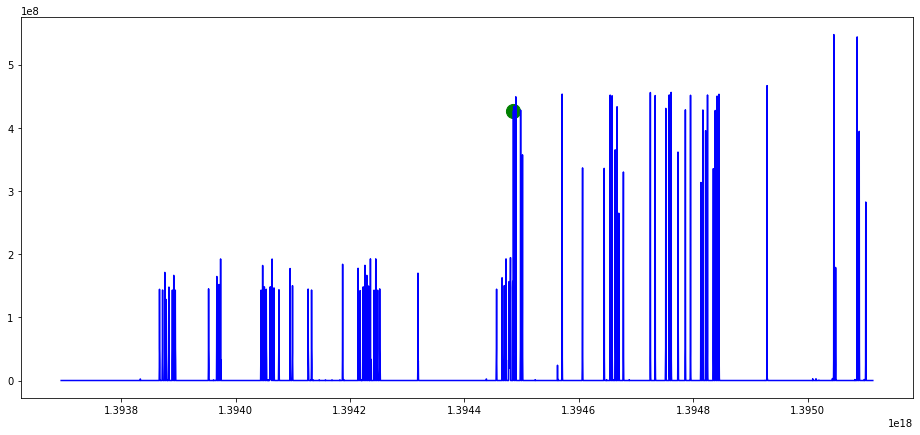

In [32]:
def prepare_plot(data_frame):
    fig, ax = plt.subplots()
    ax.plot(data_frame['time_epoch'],
               data_frame['value'],  color='blue')

    labled_anomalies = data_frame.loc[data_frame['anomaly_label'] == 1, ['time_epoch', 'value']]
    ax.scatter(labled_anomalies['time_epoch'],
               labled_anomalies['value'], s=200, color='green')

    return ax


figsize(16, 7)
prepare_plot(training_data_frame)
plt.show()
